# ```Содержание```

* Импорт необходимого и доступные стили для matplotlib
* [Загрузка сгенерированного датасета с помощью функции generation_data.generate_dataset](#генерация-датасета)
* Простой вывод данных и легенды
* [Создание подграфиков и небольшая вариация](#подграфики-subplots)

P.S. пока так. по ходу дела буду добавлять



In [42]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background') # тёмный фон
plt.style.use('fast') # хз что это :D
plt.style.use('seaborn-v0_8-bright') # яркие красивые цвета


import sys
import os

# путь к папке snippets (на уровень выше + 'snippets')
snippets_path = os.path.abspath(os.path.join(os.getcwd(), '..'))
print("Добавляемый путь:", snippets_path)

if snippets_path not in sys.path:
    sys.path.append(snippets_path)

# проверь, что файл действительно существует:
print("Содержимое каталога:", os.listdir(snippets_path))

# теперь импортируй модуль
import generation_data as gd

Добавляемый путь: /Users/kathrinebovkun/PycharmProjects/experiments/snippets
Содержимое каталога: ['visualization', 'metrics.py', 'models', 'feature_engineering', 'generation_data.py']


[Вариации построения разнообразных графиков через matplotlib][1]

[1]: https://habr.com/ru/articles/468295/

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

## Генерация датасета

In [43]:
X, y = gd.generate_dataset(
    n_samples=200,
    n_features=3,
    regression_type='polynomial',
    noise_type='uniform',
    distribution='exponential',
    add_missing=True,
    missing_rate=0.1,
    add_categorical=True,
    n_cat_features=2,
    add_binary=True,
    n_bin_features=2
)

df = X.copy()
df['target'] = y
print(df.head())


         X1        X2        X3   X4   X5   X6   X7   X8   X9  X10  X11  \
0  0.882330  1.241631  0.103954  0.0  1.0  0.0  1.0  0.0  0.0  0.0  NaN   
1  0.132172  0.101757  1.405841  0.0  1.0  NaN  1.0  0.0  0.0  0.0  1.0   
2  0.930004  0.112857  0.079205  1.0  0.0  0.0  1.0  0.0  0.0  1.0  1.0   
3       NaN       NaN  1.187306  1.0  NaN  0.0  0.0  NaN  1.0  0.0  1.0   
4  2.004082  0.007267  1.033943  0.0  1.0  0.0  NaN  0.0  1.0  1.0  1.0   

      target  
0 -16.481475  
1  -4.248741  
2 -15.521431  
3   1.054338  
4 -11.540066  


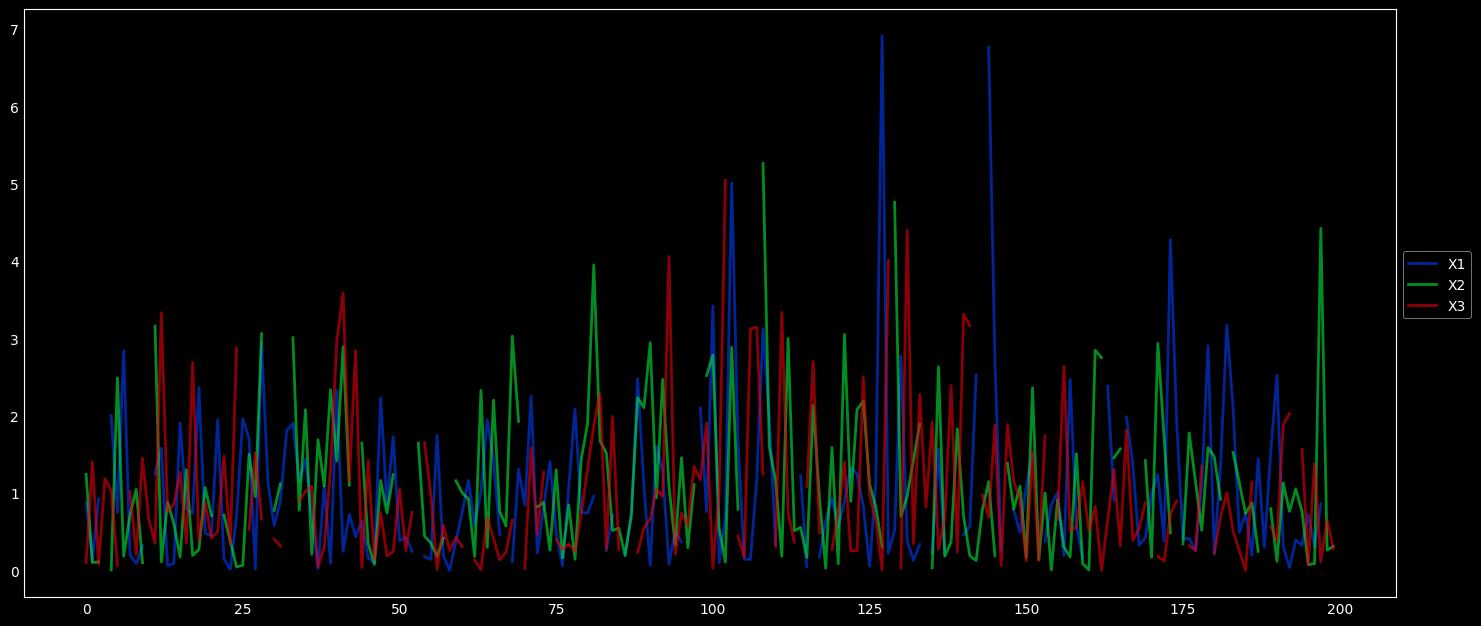

In [53]:
plt.figure(figsize=(14, 6))
plt.plot(df['X1'], alpha=0.6, label='X1')
plt.plot(df['X2'], alpha=0.6, label='X2')
plt.plot(df['X3'], alpha=0.6, label='X3')
plt.legend(bbox_to_anchor=(1, 0.6))
plt.grid()

## Подграфики subplots

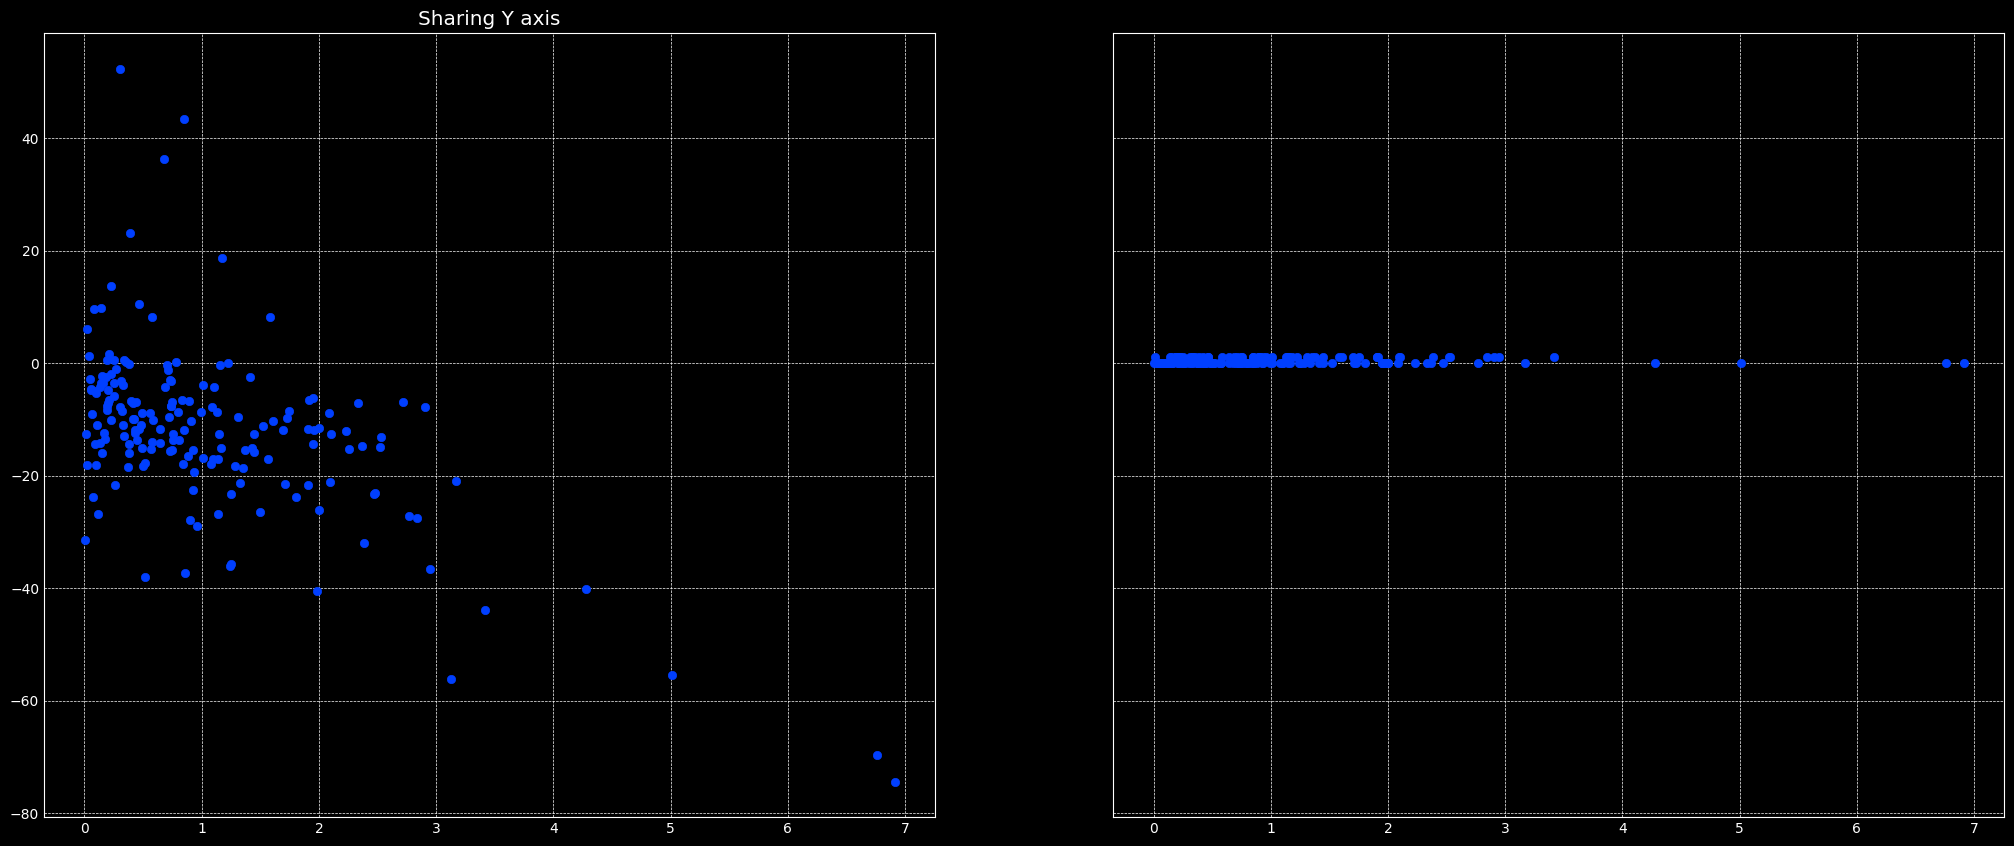

In [54]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(20, 8)) # rows, cols
ax1.scatter(df['X1'], df['target'])
ax1.set_title('Sharing Y axis')
ax2.scatter(df['X1'], df['X4'])
plt.show()

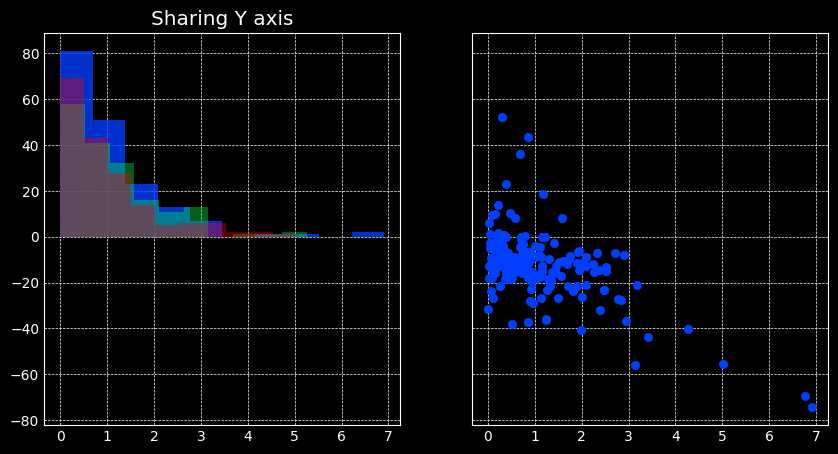

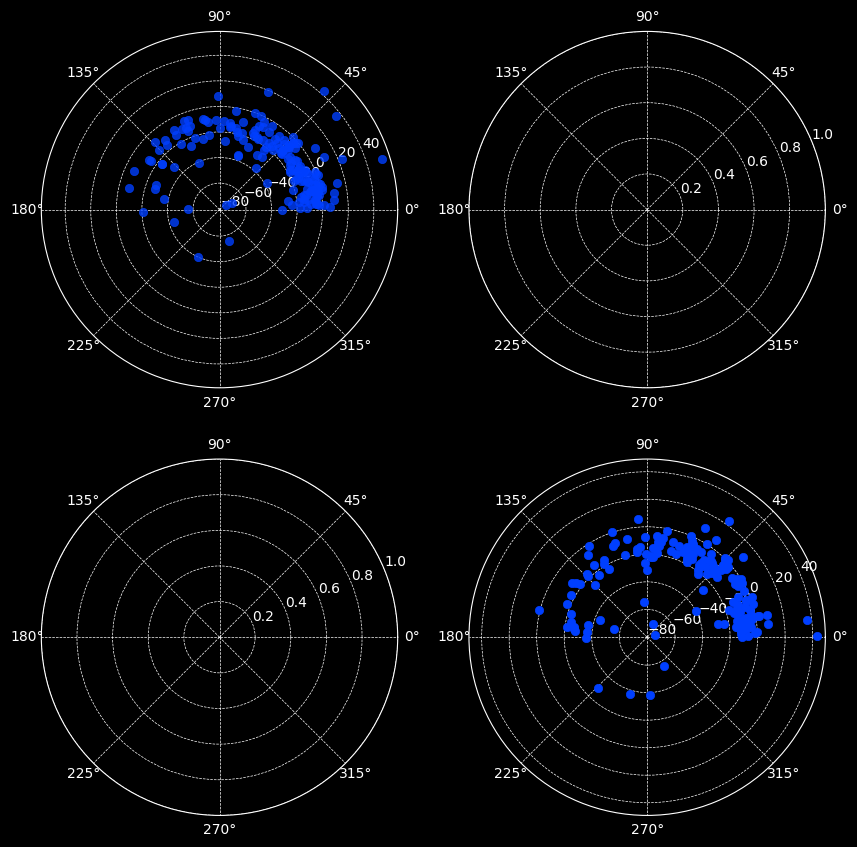

In [46]:
# Create two subplots and unpack the output array immediately
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
ax1.hist(df['X1'], alpha=0.8)
ax1.hist(df['X2'], alpha=0.4)
ax1.hist(df['X3'], alpha=0.4)
ax1.set_title('Sharing Y axis')
ax2.scatter(df['X1'], df['target'])
plt.show()

# Create four polar Axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"), figsize=(8, 8))
axs[0, 0].scatter(df['X1'], df['target'], alpha=0.8)
axs[1, 1].scatter(df['X2'], df['target'])
plt.show()